In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
marathon = pd.read_csv("./marathon_results_2017.csv", usecols=["Age","M/F","Country","40K"])
marathon["TimeSeconds"] = marathon["40K"].replace('-', 0).apply(lambda x: pd.Timedelta(x).total_seconds())


<Axes: xlabel='Age', ylabel='TimeSeconds'>

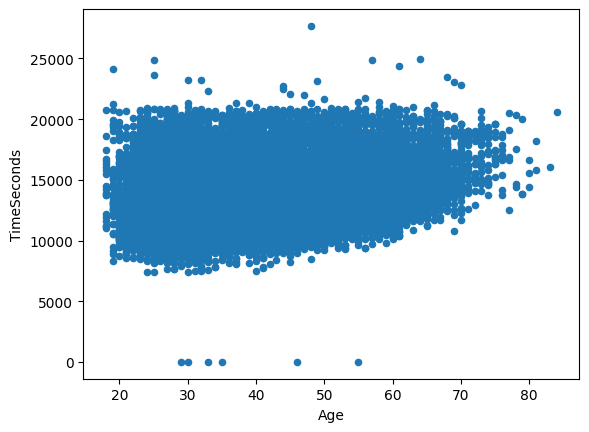

In [4]:
marathon.plot(kind="scatter", x="Age", y="TimeSeconds")

In [6]:
is_man = marathon["M/F"] == "M"
marathon_m = marathon[is_man]
marathon_m.head(5)

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,2:02:53,7373.0
1,30,M,USA,2:03:14,7394.0
2,25,M,JPN,2:03:38,7418.0
3,32,M,USA,2:04:35,7475.0
4,31,M,KEN,2:05:00,7500.0


In [7]:
marathon_w = marathon[~ is_man]
marathon_w.head(5)

,Age,M/F,Country,40K,TimeSeconds
20,37,F,KEN,2:14:43,8083.0
23,27,F,BRN,2:15:42,8142.0
24,25,F,USA,2:15:54,8154.0
33,33,F,USA,2:17:25,8245.0
43,33,F,KEN,2:19:07,8347.0


<Axes: xlabel='Age', ylabel='TimeSeconds'>

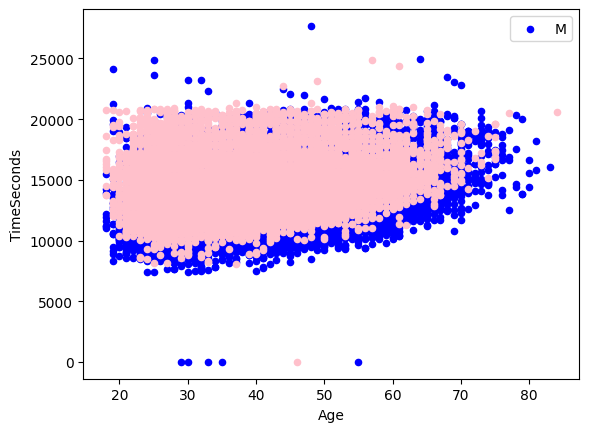

In [8]:
ax = marathon_m.plot.scatter(x="Age",y="TimeSeconds",color="Blue",label="M")
marathon_w.plot.scatter(x="Age",y="TimeSeconds",color="Pink",ax=ax)

<Axes: xlabel='Age', ylabel='TimeSeconds'>

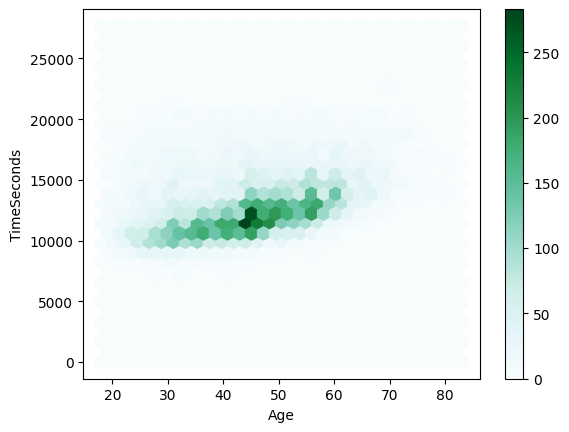

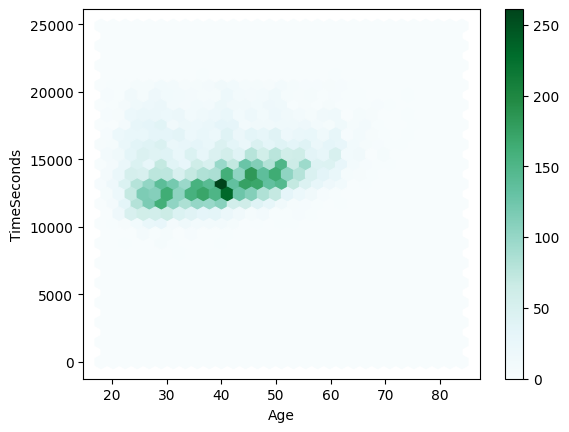

In [9]:
marathon_m.plot.hexbin(x="Age",y="TimeSeconds",gridsize=30)
marathon_w.plot.hexbin(x="Age",y="TimeSeconds",gridsize=30)



In [12]:
import datetime
#Import data
nasa = pd.read_csv("nasa_facebook_statuses.csv", 
usecols=["status_published","num_likes"])
#Convert column type to date time
nasa["status_published"] = pd.to_datetime(nasa["status_published"])
#Select observations between two datetimes - May 2015
filter =(nasa['status_published'] >= '2016-5-1') & (nasa['status_published'] < '2016-6-1')
nasa = nasa[filter]
#Add column with day only
nasa['day'] = nasa.apply(lambda row: row["status_published"].day,axis=1)
#Group all columns by sum
#Remove column with status_published - we don't need it anymore
nasa.drop('status_published', axis='columns', inplace=True)
#Group all columns by sum
nasa_by_day = nasa.groupby(by='day').sum()
nasa_by_day.head()
#Import data
bean = pd.read_csv("mrbean_facebook_statuses.csv", 
usecols=["status_published","num_likes"])
#Convert column type to date time
bean["status_published"] = pd.to_datetime(bean["status_published"])
#Select observations between two datetimes - May 2015
filter =(bean['status_published'] >= '2016-5-1') & (bean['status_published'] < '2016-6-1')
bean = bean[filter]
#Add column with day only
bean['day'] = bean.apply(lambda row: row["status_published"].day,axis=1)
#Remove column with status_published - we don't need it anymore
bean.drop('status_published', axis='columns', inplace=True)
#Group all columns by sum
days = bean.groupby(by='day').sum()
days.head()
#Group all columns by sum
bean_by_day = bean.groupby(by='day').sum()
days = nasa["day"].append(bean["day"])
days = days.unique()
fb = pd.DataFrame(index=days).sort_index()
fb['nasa'] = nasa_by_day["num_likes"]

fb['bean'] = bean_by_day["num_likes"]
fb.fillna(value=0, inplace=True)
fb.head()

AttributeError: 'Series' object has no attribute 'append'

In [ ]:
fb.plot(kind="area")

